# De effectiviteit van een prijsvergelijking d.m.v. van google.

Met de naderende feestdagen op komst, leek het mij leuk om als eindproject te testen hoe effectief het is, om op google te zoeken naar sinterklaas kadootjes.

* Via een webscraper zoeken we met 2 query's naar kado's. De resultaten zetten we in een SQL database.
* We testen met deze 2 query's wat de effectiviteit is, om middels google een prijsvergelijking te maken voor 2 artikelen.
* Bij de ene query scrapen we de prijzen middels google ads en bij de andere query scrapen we de prijzen middels google search. 
* De resultaten van de query's zetten we in een SQL database, die we middels pandas onderzoeken en opschonen.

* Met de website `www.brickwatch.nl`, die prijzen van lego sets publiceert, kunnen we controleren, hoe onze opdracht geslaagd is. Wellicht halen we een beter resultaat.


We beginnen met de Lego query, daarna gaan we de Playmobil query doen.

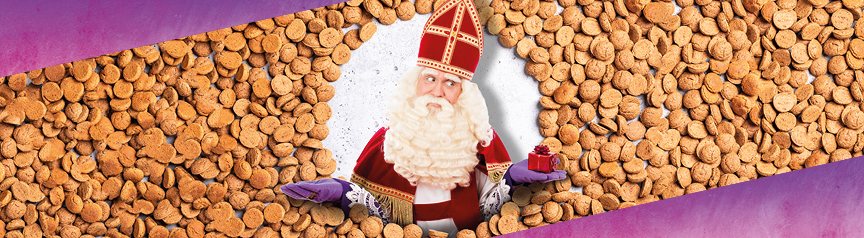

In [1]:
from IPython import display
display.Image("sinterklaas.jpg")

We importeren nu de benodigde modules, runnen de scraper en zetten de resultaten in een sql database.

In [ ]:
import pandas as pd
import seaborn as sns
import mysql.connector as sql
import matplotlib.pyplot as plt

# we runnen de webscraper met 2 query's.
%run scraper.py

# connectie maken met de database
try:
    mydb = sql.connect(host="localhost", database = 'Scraping',user="bit_academy", passwd="bit_academy",use_pure=True)
    query = "Select * from Lego;"
    df = pd.read_sql(query,mydb)
    mydb.close() 
    
#close the connection
except Exception as e:
    mydb.close()
    print(str(e))
    
print(f"De dataset 'Lego' heeft {len(df)} zoekresultaten.")
df.head()



====== WebDriver manager ======
Current google-chrome version is 95.0.4638
Get LATEST chromedriver version for 95.0.4638 google-chrome
Driver [/Users/Anja_Macbook/.wdm/drivers/chromedriver/mac64/95.0.4638.69/chromedriver] found in cache


We gaan de data nu valideren. 

1. Eerst filteren we de database op juiste titels. 
2. We filteren de duplicates eruit, gebaseerd op title, link en price
3. Daarna verwijderen we de datapunten, die een 'light-set' aanbieden in plaats van het item zelf.
4. We filteren de datapunten die een 'tweedelige' set aanbieden.
5. We filteren de aanbiedingen eruit met het woord 'compatibiliteit' omdat dat vermoedelijk geen originele Lego is.

In [ ]:
# deze woorden gebruiken we om de 'foute' datapunten eruit te filteren
reg = 'light|Light|Verlichting|verlichting|2-delige|compatibiliteit|Compatibiliteit'

# database opschonen
df_clean = df[df.title.str.contains('75954')==True]
df_clean = df_clean.drop_duplicates(subset=['title', 'link', 'price'], keep='first')
df_clean = df_clean[df_clean.title.str.contains(reg)==False]
df_clean = df_clean[df_clean['price'].str.contains('empty')==False]

# prijzen in kolom 'price' omzetten in float, t.b.v. grafieken maken
df_clean[['garbage', 'price']] = df_clean['price'].str.split('€', n=1, expand=True)
df_clean.drop(['garbage'], axis=1, inplace=True)
X_replace = df_clean['price'].replace(',','.', regex=True)
df_clean['price'] = X_replace.values
df_clean['price'] = df_clean['price'].astype(float)

# resultaat na opschonen
print(f"We zien dat er van de {len(df)} zoekresultaten, slechts {len(df_clean)} zijn overgebleven.")
print(f"De zoekopdracht was {round(len(df_clean) / len(df) * 100)}% effectief.")
df_clean

We gaan nu brickwatch scrapen, om een vergelijking van data te kunnen doen.

In [ ]:
# we runnen een andere webscraper voor brickwatch
%run scraper2.py


df_brick = pd.read_csv('brick.csv')

# data opschonen / prijzen numeric maken
df_brick[['garbage', 'price']] = df_brick['price'].str.split('€', n=1, expand=True)
df_brick.drop(['garbage'], axis=1, inplace=True)
X_replace = df_brick['price'].replace(',','.', regex=True)
df_brick['price'] = X_replace.values
df_brick['price'] = df_brick['price'].astype(float)

print(df_brick)

We gaan nu de prijzen en de verkopers plotten.

In [ ]:
# lego df sorteren op prijs
prices_l = df_clean.sort_values(by='price')

# plots definieren
fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=False)

# rotate ticklabels for all axes
for ax in axs:
    ax.tick_params(labelrotation=45)

# titel voor de gehele plot aangeven
fig.suptitle("Lego 75954 verkoopprijzen", fontsize=20, color='black')

# plot 1:
sns.barplot(ax=axs[0], data=prices_l, x=prices_l.seller, y=prices_l.price)
sns.set_style("darkgrid")
axs[0].set(xlabel='Verkoper', ylabel='Verkoopprijzen')
axs[0].set_title("Anja's selectie", fontsize=14)
ax.set(ylim=(0, 160))

# plot2:
sns.barplot(ax=axs[1], data=df_brick, x=df_brick.seller, y=df_brick.price)
sns.set_style("darkgrid")
axs[1].set(xlabel='Verkoper', ylabel='Verkoopprijzen')
axs[1].set_title("Brickwatch", fontsize=14)
ax.set(ylim=(0, 160))


### Conclusie Lego opdracht

We kunnen met google de prijzen van een Lego set zoeken. We haalden er resultaten uit, die redelijk vergelijkbaar zijn met de resultaten van een andere prijzen-scraper, zoals brickwatch.

We gaan nu verder met de Playmobil zoekopdracht.

In [ ]:
# connectie maken met de database
try:
    mydb = sql.connect(host="localhost", database = 'Scraping',user="bit_academy", passwd="bit_academy",use_pure=True)
    query = "Select * from Playmobil;"
    df = pd.read_sql(query,mydb)
    mydb.close() 
    
#close the connection
except Exception as e:
    mydb.close()
    print(str(e))

pd.set_option('display.max_columns', None)
print(f"De dataset heeft {len(df)} zoekresultaten.")
df_clean

We gaan de data nu valideren. 

1. Eerst filteren we de database op juiste titels.
2. Daarna moeten we de prijzen omzetten in floats.
3. We kijken hoeveel resultaten er zijn overgebleven.


In [ ]:
# database opschonen; juiste nummer, duplicates eruit, empty prijzen eruit
df_clean = df[df.title.str.contains('70447')==True]
df_clean = df_clean.drop_duplicates(subset=['title', 'seller', 'price'], keep='last')
df_clean = df_clean[df_clean['price'].str.contains('empty')==False]

# prijzen in kolom 'price' omzetten in integer, t.b.v. grafieken maken
df_clean[['garbage', 'price']] = df_clean['price'].str.split('€', expand=True)
df_clean.drop(['garbage'], axis=1, inplace=True)
df_clean['price'] = df_clean['price'].astype(float)

# resultaat na opschonen
print(f"We zien dat er van de {len(df)} zoekresultaten, slechts {len(df_clean)} zijn overgebleven.")
print(f"De zoekopdracht was {round(len(df_clean) / len(df) * 100)}% effectief.")

df_clean

We gaan nu de gegevens van de Playmobil query plotten.

In [ ]:
prices_p = df_clean.sort_values(by='price')

sns.barplot(x=prices_p.price, y=prices_p.seller)
plt.xticks(rotation=45)
plt.xlabel("Verkoopprijzen", size=16)
plt.ylabel("Verkoper", size=16)
plt.title("Playmobil 70447 verkoopprijs", size=24)
plt.show()

## Conclusie

We hebben 2 keer een query gerund via google. Er komen relatief weinig zoekresultaten uit, die passend zijn voor de opdracht. Maar toch is het een handige tool die goed gebruikt kan worden voor uitzoeken van prijzen van Lego en Playmobil.